In [ ]:
pip install pandas


In [ ]:
pip install -e src/gym-idsgame

In [ ]:
!pip uninstall gymnasium
!pip install gym==0.21.0
!pip install scikit-learn

!pip install gym-idsgame==1.0.12

In [ ]:
import gymnasium
from gymnasium.core import Env

def patched_reset(self):
    return self.reset()

Env.reset = patched_reset



In [2]:
import os
import gym
import gym_idsgame
import numpy as np
import pandas as pd
import torch
# src/environment/idsgame_wrapper.py

# from src.agents.dqn_agent import DQNAgent
from src.environment.compatibility_wrapper import GymCompatibilityWrapper
from src.utils.utils import print_summary
from src.utils.plotting import plot_results
# from src.utils import create_artefact_dirs

print('DONE IMPORTING')

DONE IMPORTING


In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from src.environment.explorer import IDSGameExplorer
explorer = IDSGameExplorer()

In [4]:
import src.agents.DDQN
print(src.agents.DDQN.__file__)

/Users/krishnaasrinivas/Desktop/AI-Agent-for-Cyber-Security/src/agents/DDQN.py


In [5]:
import os
import gymnasium as gym
import warnings
from datetime import datetime

# from gym_idsgame.agents.training_agents.q_learning.q_agent_config import QAgentConfig
# from gym_idsgame.agents.training_agents.q_learning.dqn.dqn_config import DQNConfig
from experiments.util import util
from experiments.util.plotting_util import read_and_plot_results
# from src.agents.ddqn_agent import DDQNAgent
from src.utils.utils import get_output_dir, print_summary
from src.environment.compatibility_wrapper import GymCompatibilityWrapper
from src.utils.plotting import plot_results

warnings.filterwarnings('ignore')
print('done')

done


In [6]:
env_name = "idsgame-random_attack-v8"
output_dir = os.getcwd()
random_seed = 42
# env = gym.make(env_name, save_dir=output_dir + "results/data/" + str(random_seed))
# env = GymCompatibilityWrapper(env)

env = GymCompatibilityWrapper(env)
env = env.unwrapped

print("\nEnvironment Information:")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")


Environment Information:
Observation Space: Box(0, 9, (1, 11), int32)
Action Space: Discrete(30)


In [8]:
import gymnasium as gym
import numpy as np
import torch
import random
import os
import time
import matplotlib.pyplot as plt
from datetime import datetime
from src.agents.DDQN import DDQNAgent, DDQNConfig



In [9]:
# obs, _ = env.reset()
# state = obs['attacker_obs'].flatten()
# print("Flattened state shape:", state.shape)
obs, _ = env.reset()
print("Type of obs:", type(obs))
print("Observation shape or keys:", obs)
state = np.array(obs).flatten()
print("Flattened state shape:", state.shape)




Type of obs: <class 'numpy.ndarray'>
Observation shape or keys: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Flattened state shape: (33,)


In [11]:
def save_gif(env, agent, filename="agent_run.gif", num_steps=500):
        import imageio
        frames = []
        obs = env.reset()[0]
        state = np.array(obs).flatten()
    
        for _ in range(num_steps):
            frame = env.render(mode="rgb_array")
            frames.append(frame)
            action = agent.select_action(state)
            def_action = env.defender_action_space.sample()
            obs, _, done, _, _ = env.step((action, def_action))
            state = np.array(obs).flatten()
            if done:
                break
        gif_dir = os.path.join(agent.output_dir, "gifs")
        os.makedirs(gif_dir, exist_ok=True)
        gif_path = os.path.join(gif_dir, filename)
        
        imageio.mimsave(gif_path, frames, fps=30)
        print(f"GIF saved to {gif_path}")
    
        imageio.mimsave(filename, frames, fps=30)

Episode 100: AvgAttackerReward = 0.01, AvgDefReward = 0.67, Epsilon = 0.606
Episode 200: AvgAttackerReward = -0.22, AvgDefReward = 0.70, Epsilon = 0.367
Episode 300: AvgAttackerReward = 0.10, AvgDefReward = 0.49, Epsilon = 0.222
Episode 400: AvgAttackerReward = 0.05, AvgDefReward = 0.55, Epsilon = 0.135
Episode 500: AvgAttackerReward = -0.32, AvgDefReward = 0.70, Epsilon = 0.082
Episode 600: AvgAttackerReward = 0.03, AvgDefReward = 0.52, Epsilon = 0.049
Episode 700: AvgAttackerReward = -0.14, AvgDefReward = 0.67, Epsilon = 0.030
Episode 800: AvgAttackerReward = -0.18, AvgDefReward = 0.67, Epsilon = 0.018
Episode 900: AvgAttackerReward = 0.07, AvgDefReward = 0.49, Epsilon = 0.011
Episode 1000: AvgAttackerReward = 0.10, AvgDefReward = 0.55, Epsilon = 0.010
Episode 1100: AvgAttackerReward = -0.20, AvgDefReward = 0.73, Epsilon = 0.010
Episode 1200: AvgAttackerReward = -0.01, AvgDefReward = 0.46, Epsilon = 0.010
Episode 1300: AvgAttackerReward = -0.05, AvgDefReward = 0.67, Epsilon = 0.010
E

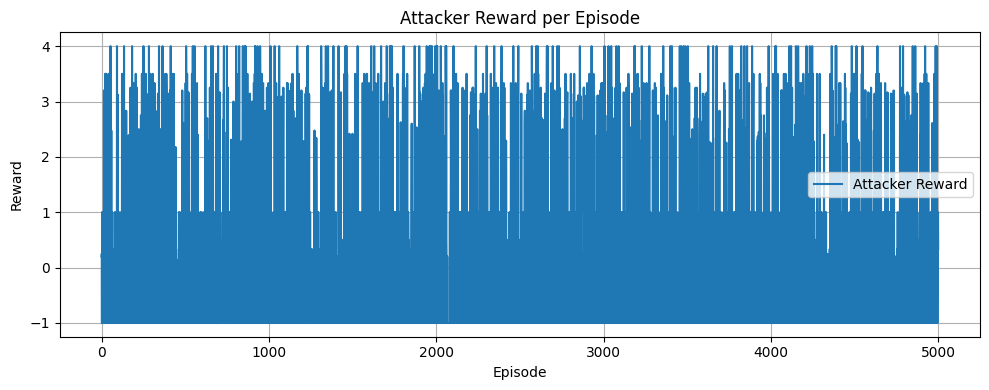

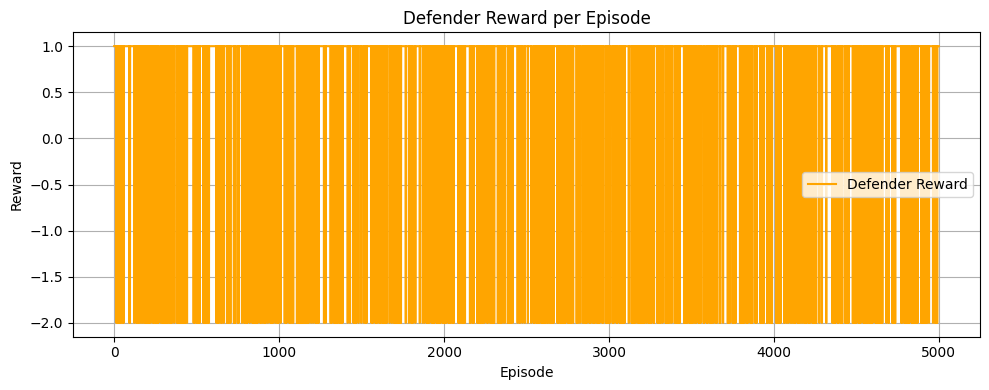

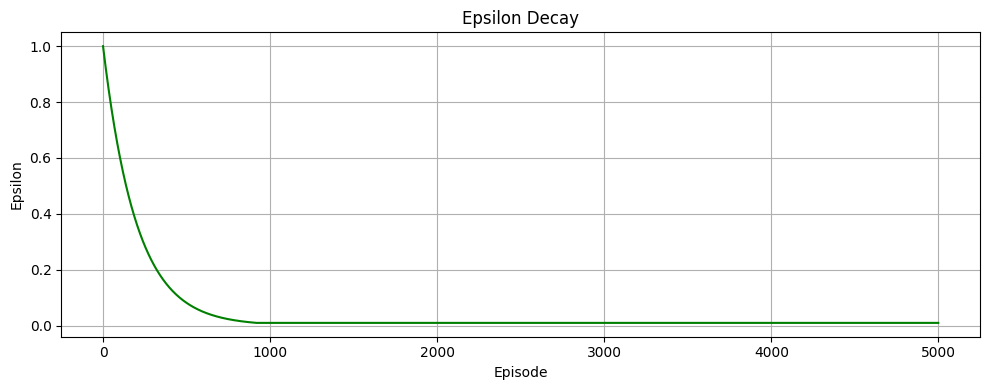

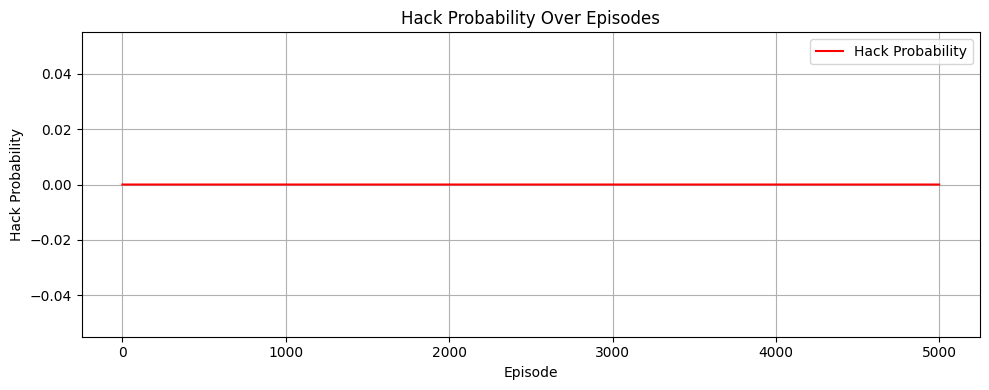


Training Summary:
--------------------------------------------------
Environment: idsgame-random_attack-v8
Total Episodes: 5000
Attacker Reward - Avg: -0.04, Max: 4.00, Min: -1.00
Defender Reward - Avg: 0.59, Max: 1.00, Min: -2.00
Avg Hack Probability: 0.00
Final Cumulative Attacker Reward: -204
Final Cumulative Defender Reward: 2960
--------------------------------------------------


NameError: name 'save_gif' is not defined

In [10]:
# Automatically pick the run folder
import glob
from src.agents.DDQN import DDQNAgent, DDQNConfig



# all_runs = sorted(glob.glob("ddqn_results/run_*"))
# assert all_runs, "No training run folder found."
# latest_run = all_runs[-1]
# csv_path = os.path.join(latest_run, "training_results.csv")



config = DDQNConfig()
agent = DDQNAgent(env, config)

results_df = agent.train_loop_simple(
    num_episodes=5000,
    max_steps=500,
    log_frequency=100
)

# Plotting
# agent.plot_ddqn_training(csv_path)



# Print summary
# results_df = pd.read_csv(csv_path)
print("\nTraining Summary:")
print("-" * 50)
print(f"Environment: {env.spec.id}")
print(f"Total Episodes: {len(results_df)}")
print(f"Attacker Reward - Avg: {results_df['attacker_reward'].mean():.2f}, Max: {results_df['attacker_reward'].max():.2f}, Min: {results_df['attacker_reward'].min():.2f}")
print(f"Defender Reward - Avg: {results_df['defender_reward'].mean():.2f}, Max: {results_df['defender_reward'].max():.2f}, Min: {results_df['defender_reward'].min():.2f}")
print(f"Avg Hack Probability: {results_df['hack_probability'].mean():.2f}")
print(f"Final Cumulative Attacker Reward: {results_df['attacker_reward'].sum():.0f}")
print(f"Final Cumulative Defender Reward: {results_df['defender_reward'].sum():.0f}")
print("-" * 50)
# agent.plot_ddqn_training(results_df)
# save_gif(env, agent, filename="ddqn_results/run_YYYY-MM-DD_HH-MM-SS/agent_run.gif")

# gif_path = os.path.join(agent.output_dir, "agent_run.gif")
c

# save_gif(env, agent, gif_path)
# print(f"GIF saved at {gif_path}")



In [12]:
save_gif(env, agent, filename="agent_run.gif", num_steps=500)


ValueError: all input arrays must have the same shape